# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 15,5
%matplotlib inline

---
# 2. import dataset

In [3]:
df1 = pd.read_excel('../0 data/Ex_Analysis20.xlsx')
df2 = pd.read_excel('../0 data/Ex_Analysis22.xlsx')
df = pd.concat([df1,df2])
df.shape

(198996, 57)

---
# 3. independent variables

In [4]:
df['id'] = df['tudatafinal.account_identifier']
df['year'] = pd.DatetimeIndex(df['tudatafinal.effectivedate']).year
df['month'] = pd.DatetimeIndex(df['tudatafinal.effectivedate']).month
df['date'] = df['year'].astype(str)+"-"+df['month'].astype(str)
df['amount'] = df[['tudatafinal.current_balance_amount', 'tudatafinal.high_credit_amount', 'tudatafinal.credit_limit_amount']].max(axis=1)
df['duration'] = df['tudatafinal.terms_payment_schedule_month_count']
df['payment'] = df['tudatafinal.manner_of_payment']
df['score'] = df['tudatafinal.finscore']
df['acctype'] = df['tudatafinal.accounttypecat']
df['paytype'] = df['tudatafinal.paymenttypecode']

In [5]:
df = df[df['tudatafinal.terms_frequency_of_payment']=='M']
df['Y'] = df['tudatafinal.pp_1_10_default']  + df['tudatafinal.pp_11_20_default'] + df['tudatafinal.pp_21_30_default'] + \
          df['tudatafinal.pp_31_40_default'] + df['tudatafinal.pp_41_50_default'] + df['tudatafinal.pp_51_60_default'] + \
          df['tudatafinal.pp_61_70_default'] + df['tudatafinal.pp_71_82_default']
df['Y'] = np.where(df['Y']==0, 0, 1)
df = df[['id', 'year', 'month', 'amount', 'duration', 'payment', 'score', 'acctype', 'paytype', 'Y']]
df.shape

(175698, 10)

---
# 4. dependent variable

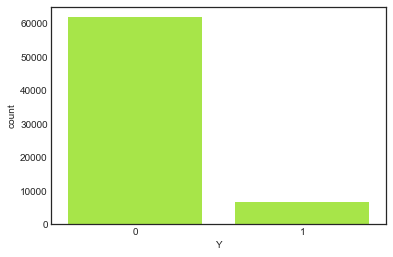

In [6]:
df = df[(df['duration']>=12) & (df['duration']<=120)]
df = df[(df['amount']>=1000) & (df['amount']<=100000)]
sns.countplot(df['Y'], color='greenyellow');

---
# 5. export dataset

In [7]:
df.to_csv('../0 data/clean.csv', index=False)
df.shape

(68294, 10)